# Univariate Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#reading the dataset
raw_data = pd.read_csv("housing_price_prediction.csv")
raw_data.head()

,Price,sqft
0,13.5,500
1,14.0,510
2,14.1,512
3,14.8,520
4,15.1,530


In [3]:
raw_data.describe()


,Price,sqft
count,209.000000,209.000000
mean,23.866411,906.947368
std,6.060221,265.128710
min,13.500000,500.000000
25%,17.880000,682.000000
50%,24.800000,880.000000
75%,29.400000,1140.000000
max,33.000000,1398.000000


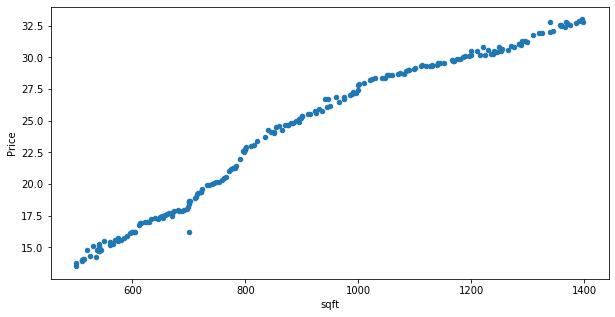

In [4]:
#plotting the data
raw_data.plot(kind='scatter',x='sqft',y='Price',figsize=(10,5))

In [5]:
##normalizing the data values
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()

,Price,sqft
0,-0.531611,-0.453171
1,-0.505970,-0.442035
2,-0.500842,-0.439808
3,-0.464944,-0.430899
4,-0.449560,-0.419763


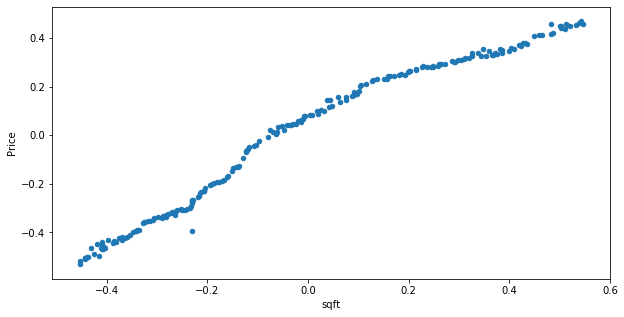

In [6]:
#after normalizing visualizing the data
data.plot(kind='scatter',x='sqft',y='Price',figsize=(10,5))

In [7]:
#shows rows and columns in the data set
data.shape

(209, 2)

In [8]:
#inserting the bias value for each value in data set
data.insert(0,'Ones',1)
data.head()

,Ones,Price,sqft
0,1,-0.531611,-0.453171
1,1,-0.505970,-0.442035
2,1,-0.500842,-0.439808
3,1,-0.464944,-0.430899
4,1,-0.449560,-0.419763


In [9]:
cols=data.shape[1]
print(cols)


3


In [10]:
#separating the input from data set
x = data.iloc[:,0:cols-1]
#separating the output from data set
y = data.iloc[:,cols-1:cols]

In [11]:
#converting into matrix form of input
#converting into matrix form of output
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))


In [12]:
#shape of the data
x.shape,theta.shape,y.shape

((209, 2), (1, 2), (209, 1))

In [14]:
def computeError(x,y,theta):
    inner = np.power(((x * theta.T)-y),2)
    return np.sum(inner)/(2 * len(x))

In [15]:
computeError(x,y,theta)

0.043375839861990395

In [16]:
#for changing the learning rate value
Learn_rate=1
iters=10000
def gradientDescent(x,y,theta,Learn_rate,iters):
        temp = np.matrix(np.zeros(theta.shape))
        parameters=int(theta.ravel().shape[1])
        cost=np.zeros(iters)
        for i in range(iters):
            error = (x*theta.T)-y
            for j in range(parameters):
                term=np.multiply(error,x[:,j])
                temp[0,j]=theta[0,j]-((Learn_rate/len(x))*np.sum(term))
            theta = temp
        cost[i] = computeError(x,y,theta)
        return theta,cost


In [17]:
#for reducing the error
new_theta,cost = gradientDescent(x,y,theta,Learn_rate,iters)
print(new_theta,cost)


[[4.16997643e-16 9.33450899e-01]] [0.         0.         0.         ... 0.         0.         0.00149863]


In [18]:
#compute error after gradient descent
computeError(x,y,new_theta)

0.0014986278721006638

In [21]:
x=data.sqft
print(x[:20])

0    -0.453171
1    -0.442035
2    -0.439808
3    -0.430899
4    -0.419763
5    -0.408627
6    -0.397492
7    -0.453171
8    -0.442035
9    -0.442035
10   -0.436467
11   -0.425331
12   -0.414195
13   -0.403059
14   -0.407514
15   -0.408627
16   -0.386356
17   -0.369652
18   -0.358516
19   -0.364084
Name: sqft, dtype: float64


In [22]:
#predicting the model
Model_sq_ft = new_theta[0,0] + (new_theta[0,1]*x)

Text(0.5, 1.0, 'Predicted Size vs. Price')

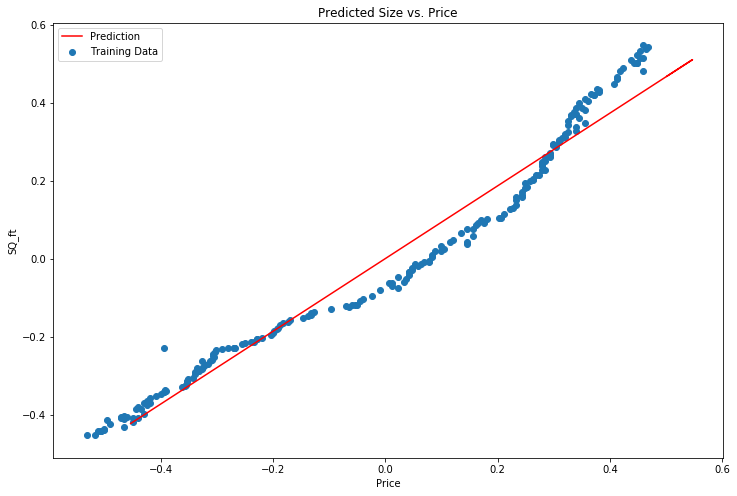

In [23]:
#plotting the model
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,Model_sq_ft,'r',label='Prediction')
ax.scatter(data.Price,data.sqft,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Price')
ax.set_ylabel('SQ_ft')
ax.set_title('Predicted Size vs. Price')


Text(0.5, 1.0, 'Error vs iterations')

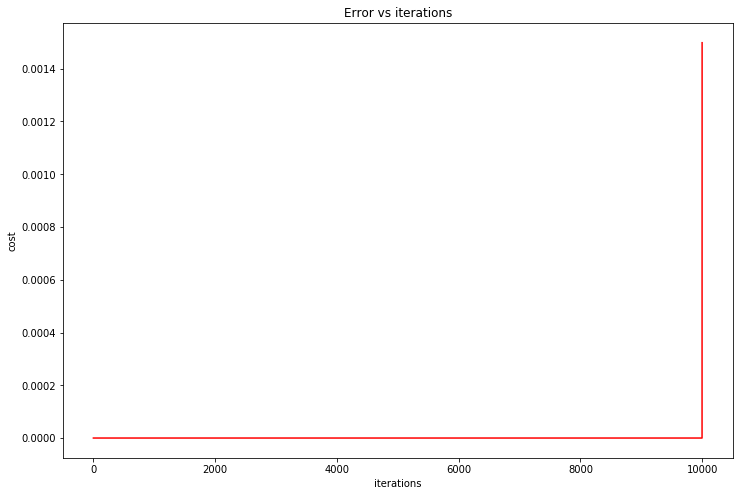

In [24]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('Error vs iterations')


In [25]:
import math
erro_r = [np.power((b-a),2) for (a,b) in zip(Model_sq_ft,y)]
error0 =np.sum(erro_r)
error=(error0/len(y))*100
print("error % = {}".format(error))
accuracy=100-error
print("accuracy %={}".format(accuracy))

error % = 0.03842043494870075
accuracy %=99.9615795650513


In [26]:
def predict(new_theta,accuracy):
    Price=float(input("Enter the price of the house:"))
    Price=(Price - raw_data.Price.mean())/(raw_data.Price.max() - raw_data.Price.min())
    sqft=(new_theta[0,0]+(new_theta[0,1]*Price))
    Predicted_sqft = (sqft*(raw_data.sqft.max()-raw_data.sqft.min())) + (raw_data.sqft.mean())
    sqft_at_max_Accuracy = (Predicted_sqft * (1/accuracy) * 100)
    sqft_range = sqft_at_max_Accuracy - Predicted_sqft
    return Predicted_sqft,sqft_range

In [27]:
Predicted_sqft,sqft_range=predict(new_theta,accuracy)
print('your house sqft is:'+str(Predicted_sqft)+ '(+ or -)' +str(sqft_range))

Enter the price of the house:30
your house sqft is:1170.609549793559(+ or -)0.449926144163328
